<a href="https://colab.research.google.com/github/samula98/proj1/blob/main/SundaySadday_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 – To Do List



## Problem Definition

1. Write a concise problem definition for the project. Put it in a text field at the top of your Jupyter notebook.

 -This project is supervised and


## Data Collection

2. Load Pandas, Numpy, and Matplotlib..

1. Load data Train.csv from the Google Drive folder.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing

In [2]:
# base_path points to the data at the url
base_path = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/'
# train_path is the data that will train the model
train_path = base_path + 'Transaction.train.csv'
# test_path is the data that will test the model
test_path = base_path + 'Transaction.test.csv'

In [3]:
#url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv'
#transaction_train = pd.read_csv(url)

## Data Cleaning

4. Examine the data using tools we have used in class.

1. If there are data cleaning issues, develop recommendations for how to deal with them.



In [4]:
transaction_train = pd.read_csv(train_path)
transaction_train.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [5]:
transaction_train.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,0,1,2,3,4,5,6,7,8,9
ID_code,train_0,train_1,train_2,train_3,train_4,train_5,train_6,train_7,train_8,train_9
target,0,0,0,0,0,0,0,0,0,0
var_0,8.9255,11.5006,8.6093,11.0604,9.8369,11.4763,11.8091,13.558,16.1071,12.5088
var_1,-6.7863,-4.1473,-2.7457,-2.1518,-1.4834,-2.3182,-0.0832,-7.9881,2.4426,1.9743
var_2,11.9081,13.8588,12.0805,8.9522,12.8746,12.608,9.3494,13.8776,13.9307,8.896
var_3,5.1187,5.6208,6.9427,5.8428,5.9405,4.5322,6.1961,5.689,4.4514,6.0637
var_4,5.747,8.0851,5.9525,8.245,7.6784,5.979,7.9232,7.1971,9.0827,7.9682
var_5,14.0137,14.0239,14.1929,13.8463,13.8481,13.638,14.1629,14.2919,14.0654,13.9639
var_6,0.5745,8.4135,7.3124,11.9704,7.8895,1.2589,13.3058,10.9699,-3.0572,0.8071


In [6]:
transaction_train.shape

(180000, 53)

In [7]:
transaction_train.tail(10).transpose()

,179990,179991,179992,179993,179994,179995,179996,179997,179998,179999
Unnamed: 0,179990,179991,179992,179993,179994,179995,179996,179997,179998,179999
ID_code,train_179990,train_179991,train_179992,train_179993,train_179994,train_179995,train_179996,train_179997,train_179998,train_179999
target,0,0,0,0,0,0,0,0,0,0
var_0,10.0158,11.0303,10.3811,8.6353,15.7964,8.9112,8.2722,12.4902,8.4894,11.6252
var_1,-6.2072,-4.4768,-1.6522,-3.9536,-1.0888,-4.49,7.1923,-2.9379,0.7048,3.3959
var_2,12.5506,12.4445,10.5636,12.4717,17.2377,11.3795,16.73,6.5901,11.1518,11.5558
var_3,5.8199,4.1073,5.7018,4.0501,4.1423,5.4164,4.9698,4.7242,4.637,4.2003
var_4,9.1829,7.5998,9.8771,8.6818,7.7214,8.3309,5.4907,9.1423,8.1321,7.4666
var_5,13.8532,13.812,14.193,14.2331,14.1565,14.1869,14.0238,13.9133,14.2921,13.7381
var_6,-1.2734,3.6838,2.2785,13.1255,6.82,12.8219,11.9933,12.2314,6.9582,12.959


<Axes: >

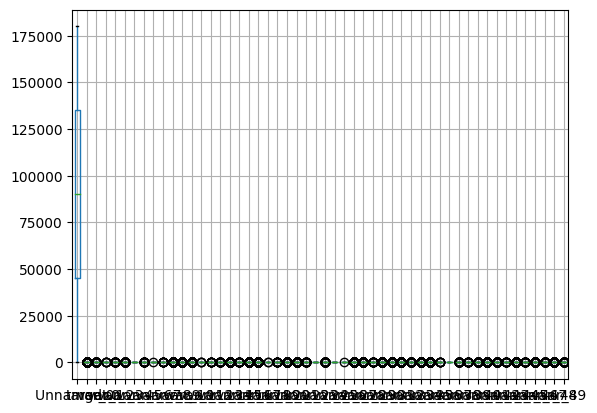

In [8]:
transaction_train.boxplot()

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'var_0'}>,
        <Axes: title={'center': 'var_1'}>,
        <Axes: title={'center': 'var_2'}>,
        <Axes: title={'center': 'var_3'}>,
        <Axes: title={'center': 'var_4'}>],
       [<Axes: title={'center': 'var_5'}>,
        <Axes: title={'center': 'var_6'}>,
        <Axes: title={'center': 'var_7'}>,
        <Axes: title={'center': 'var_8'}>,
        <Axes: title={'center': 'var_9'}>,
        <Axes: title={'center': 'var_10'}>,
        <Axes: title={'center': 'var_11'}>],
       [<Axes: title={'center': 'var_12'}>,
        <Axes: title={'center': 'var_13'}>,
        <Axes: title={'center': 'var_14'}>,
        <Axes: title={'center': 'var_15'}>,
        <Axes: title={'center': 'var_16'}>,
        <Axes: title={'center': 'var_17'}>,
        <Axes: title={'center': 'var_18'}>],
       [<Axes: title={'center': 'var_19'}>,
        <Axes: title={'center': 'va

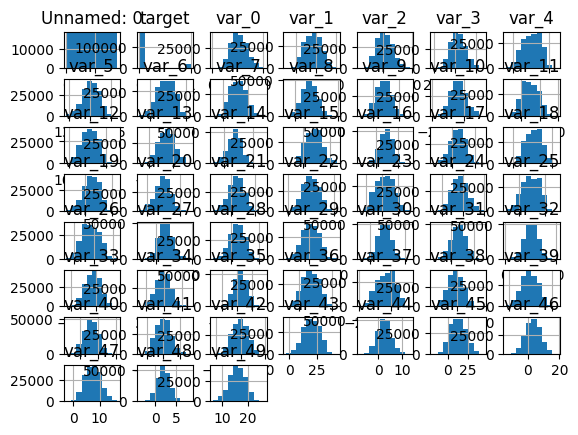

In [9]:
transaction_train.hist()

In [10]:
transaction_train


,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760


In [11]:
transaction_train.shape

(180000, 53)

In [12]:
transaction_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  180000 non-null  int64  
 1   ID_code     180000 non-null  object 
 2   target      180000 non-null  int64  
 3   var_0       180000 non-null  float64
 4   var_1       180000 non-null  float64
 5   var_2       180000 non-null  float64
 6   var_3       180000 non-null  float64
 7   var_4       180000 non-null  float64
 8   var_5       180000 non-null  float64
 9   var_6       180000 non-null  float64
 10  var_7       180000 non-null  float64
 11  var_8       180000 non-null  float64
 12  var_9       180000 non-null  float64
 13  var_10      180000 non-null  float64
 14  var_11      180000 non-null  float64
 15  var_12      180000 non-null  float64
 16  var_13      180000 non-null  float64
 17  var_14      180000 non-null  float64
 18  var_15      180000 non-null  float64
 19  va

In [13]:
# summing up all the nulls in the data set
transaction_train.isnull().sum().sum()

0

In [14]:
transaction_train.isna()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
transaction_train.min()

,0
Unnamed: 0,0
ID_code,train_0
target,0
var_0,0.4084
var_1,-15.0434
var_2,2.1171
var_3,2.3473
var_4,3.9705
var_5,13.4346
var_6,-6.0111


## Exploratory Data Analysis

6. Produce some visual analysis of the data – like plots showing the distributions of all variables. Recall that Gaussian Naive Bayes assumes the predictors are normally distributed. Note: you might have to do multiple plots in groups.

1. NOTE: the ‘target’ column indicates a successful transaction (‘1’) or a no-transaction (‘0’). Verify these are the only values in that column.

1. Check the correlation values between all **predictor columns** to ensure there are no substantial correlations between predictors. This is important to support the decision to classify the ‘target’ using Naïve Bayes.

1. Create two data frames: one with all successful transactions, one with all unsuccessful transactions. **Make sure they are copies and not slices**.





In [16]:
transaction_train_clean = transaction_train.copy()
transaction_train_clean

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760


In [17]:
transaction_train_clean.shape

(180000, 53)

In [18]:
transaction_train_clean.drop("Unnamed: 0", axis = 1, inplace = True)

In [19]:
transaction_train_clean.drop("ID_code", axis = 1, inplace = True)

In [20]:
transaction_train_clean

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,22.3368,11.4176,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,16.0279,15.7685,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,15.2717,7.7995,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,20.4504,29.9869,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760


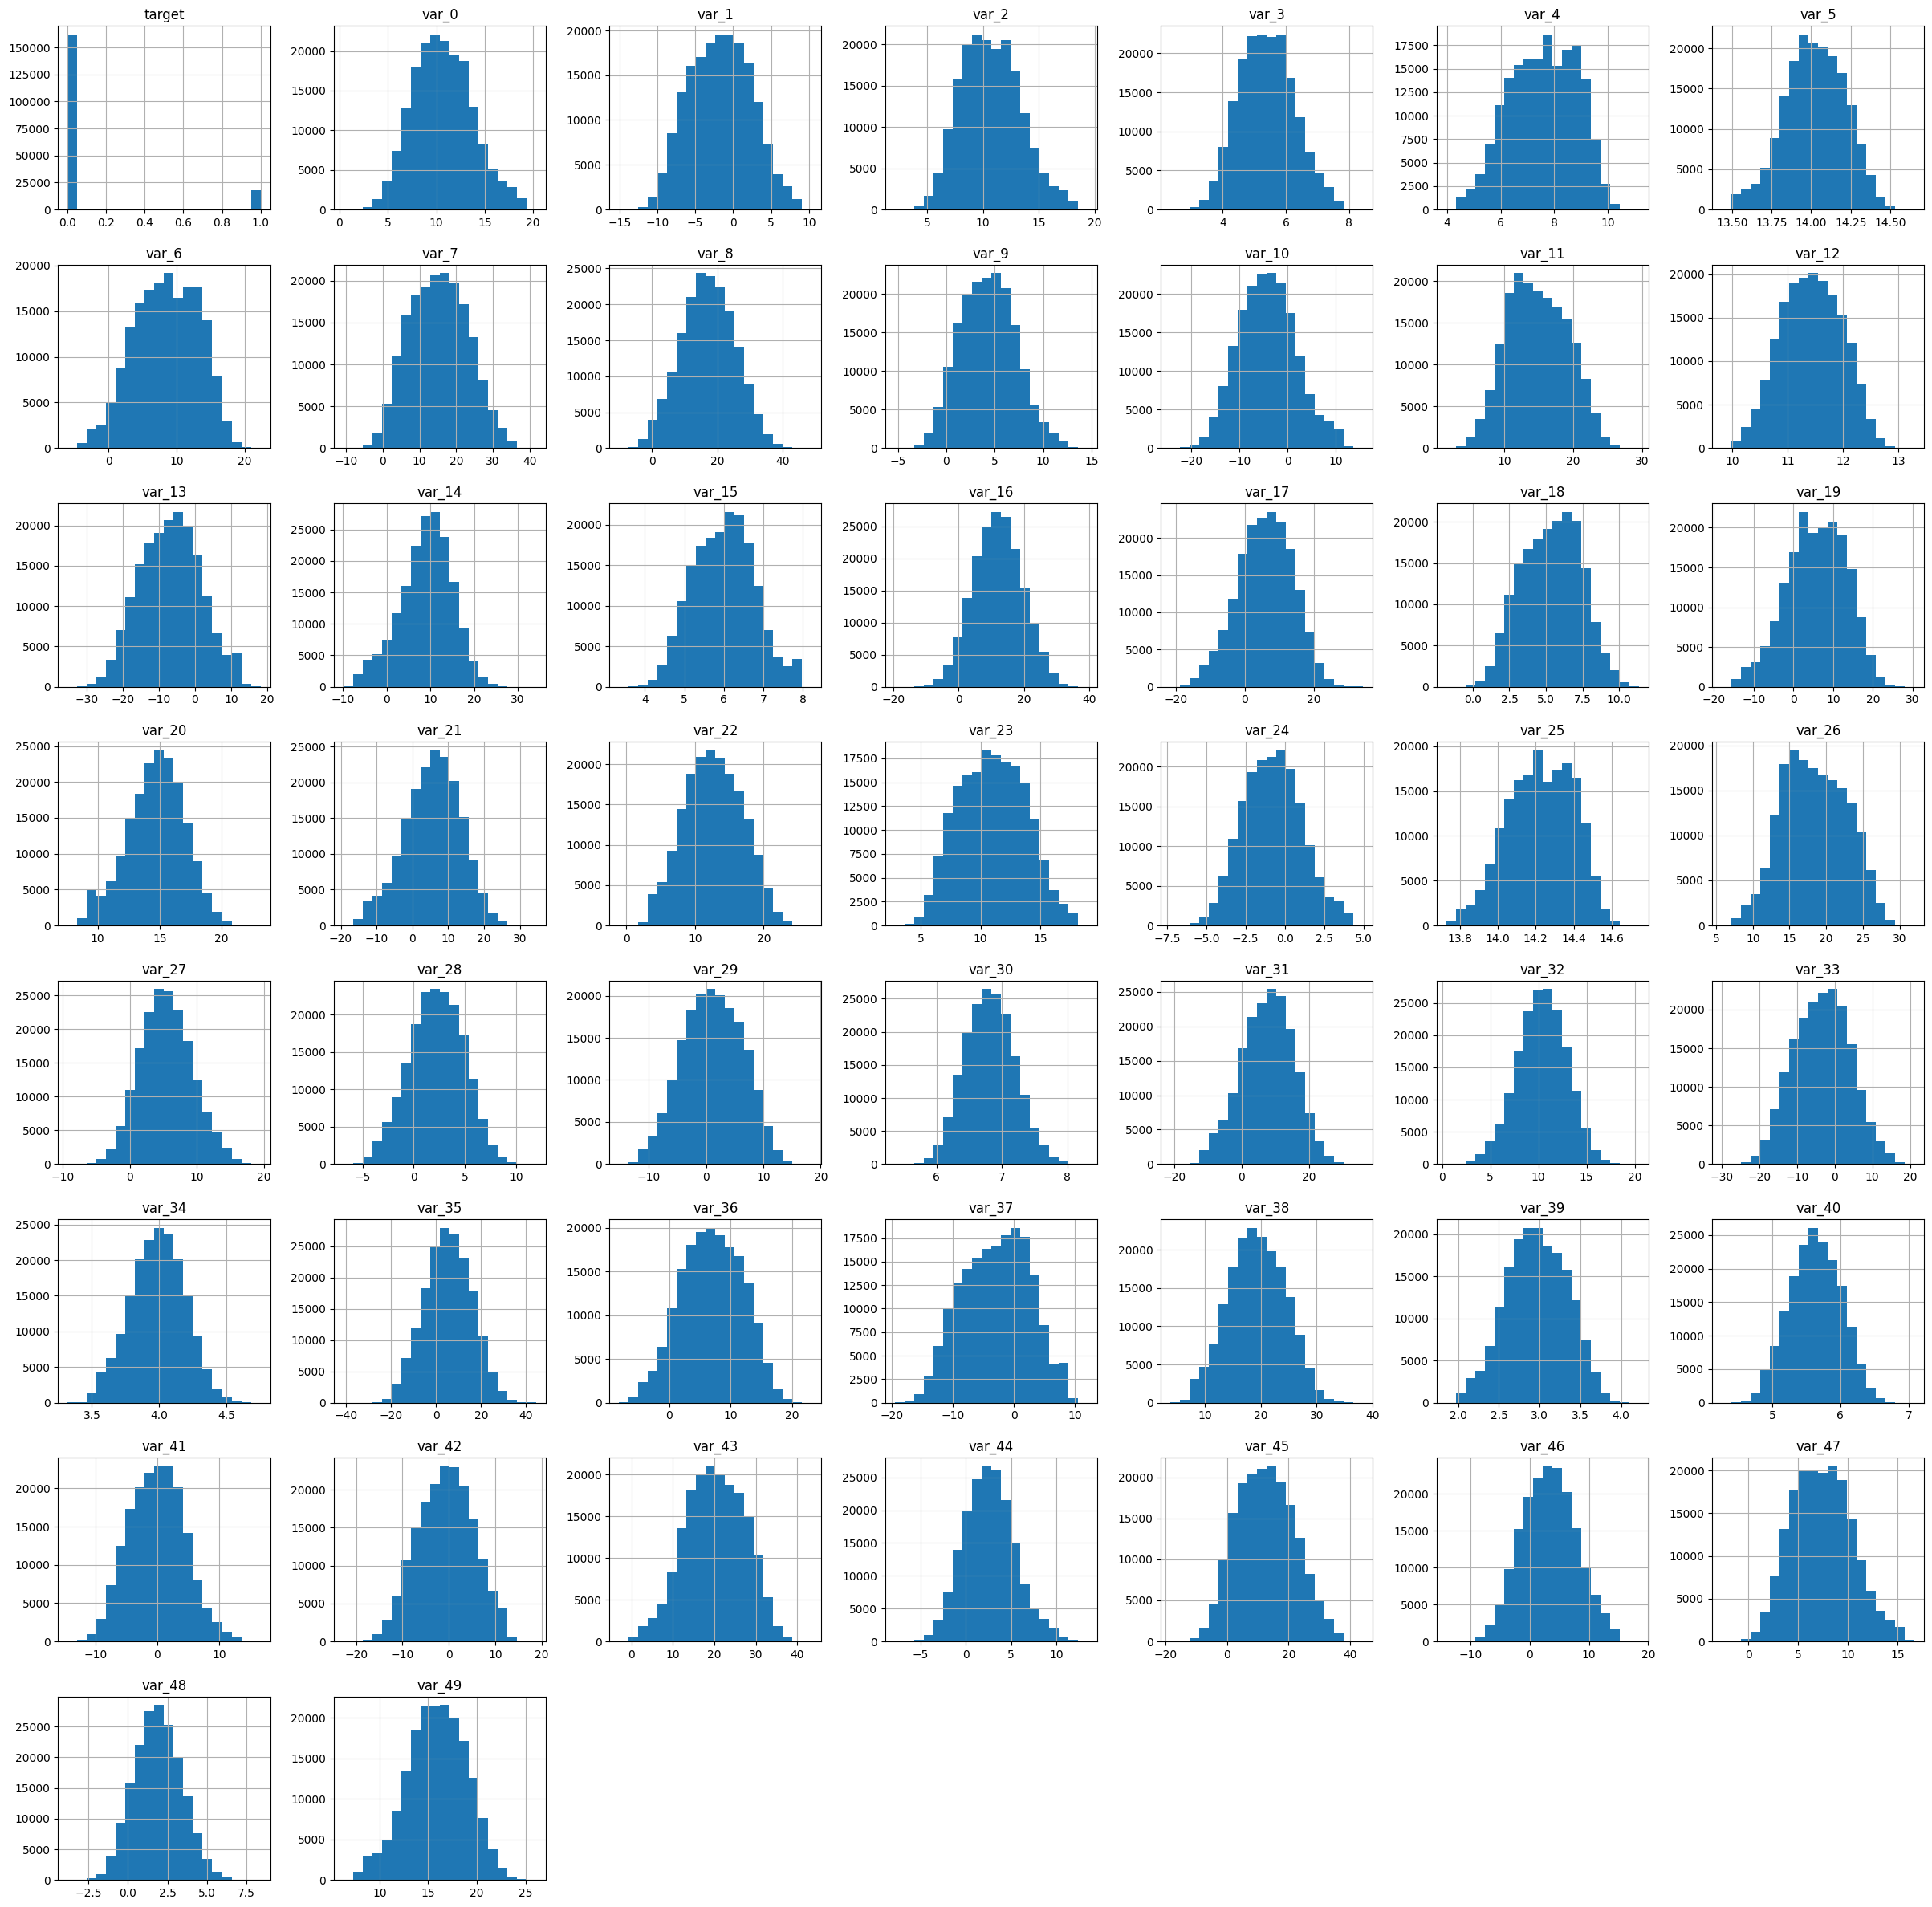

In [21]:
# transaction_train.hist(bins = 20, figsize = 10,10)
transaction_train_clean.hist(bins = 20, figsize = (30,30))
plt.show()

In [22]:
transaction_train['target'].value_counts()

,count
target,
0,161960
1,18040


In [23]:
corr = transaction_train.corr(numeric_only = True)
print(corr)

            Unnamed: 0    target     var_0     var_1     var_2     var_3  \
Unnamed: 0    1.000000  0.000715  0.001324  0.002417  0.004805  0.001110   
target        0.000715  1.000000  0.052904  0.049916  0.055450  0.066924   
var_0         0.001324  0.052904  1.000000 -0.002155  0.006632  0.007155   
var_1         0.002417  0.049916 -0.002155  1.000000  0.005644  0.002640   
var_2         0.004805  0.055450  0.006632  0.005644  1.000000  0.000679   
var_3         0.001110  0.066924  0.007155  0.002640  0.000679  1.000000   
var_4         0.000795 -0.042073 -0.002247 -0.000408 -0.001293 -0.006768   
var_5         0.000215 -0.070015 -0.003147 -0.002629 -0.002718 -0.002568   
var_6         0.005908 -0.054375 -0.001717 -0.001234 -0.009171 -0.005282   
var_7        -0.000257  0.044769  0.004266 -0.000374  0.003436  0.002685   
var_8        -0.000744 -0.057378  0.000289 -0.000378 -0.006433 -0.004835   
var_9        -0.001202  0.059227  0.002817  0.001282  0.000511  0.002293   
var_10      

In [24]:
# classification_report = metrics.classification_report(y_test, y_predict)
# print(classification_report)

In [25]:
# absolute value of corrolation
corr_target = corr.iloc[0]
corr_target.abs().sort_values(ascending = False)

,Unnamed: 0
Unnamed: 0,1.000000
var_6,0.005908
var_20,0.005602
var_34,0.005256
var_2,0.004805
var_17,0.004328
var_28,0.004324
var_31,0.003531
var_36,0.003245
var_30,0.003102


In [26]:
# successful and unsuccessful data frames
successful = transaction_train[transaction_train['target'] == 1].copy
unsuccessful = transaction_train[transaction_train['target'] == 0].copy
#print(successful)
#print(unsuccessful)

## Data Processing

10. Create two data frames: one with all the predictor columns (everything except for Unnamed: 0, ID_code and target) and one with just the target. Make sure they are copies and not slices.

1. Define a Gaussian Naïve Bayes model using Sklearn.

1. Divide the two data frames you created in step #10 into training and testing subsets.

1. Train the model using the training subset of the dataset.

1. Test the model using the testing subset of the dataset. Calculate and report the accuracy.

1. Perform a cross-validation loop to calculate the accuracy of your model. Report that accuracy. How does it compare to the accuracy you calculated in #14?

1. Plot a histogram of the accuracy scores you generated in your cross-validation loop. What do you notice about the distribution of accuracy scores?

1.  Present the confusion matrix and the results of your Classification Report (sklearn.metrics.classification_report). What do you notice?

1. The training data is very skewed towards non-successful transactions (about 90% of the training data has ‘target’==0). Remove enough non-successful transaction rows so that your remaining training data is 50%/50% split between successful and non-successful transactions. Hint: you can use the data frames you created in step #9.

1. Repeat the cross-validation process on this data set. Report what your cross-validation accuracy is in this 50/50 case.



In [27]:
# 10. Create two data frames: one with all the predictor columns
# (everything except for Unnamed: 0, ID_code and target) and one
# with just the target. Make sure they are copies and not slices.
predictors = transaction_train.copy()
predictors.drop('Unnamed: 0', axis = 1, inplace = True)
predictors.drop('ID_code', axis = 1, inplace = True)
predictors.drop('target', axis = 1, inplace = True)
print(predictors)

          var_0   var_1    var_2   var_3   var_4    var_5    var_6    var_7  \
0        8.9255 -6.7863  11.9081  5.1187  5.7470  14.0137   0.5745   4.2840   
1       11.5006 -4.1473  13.8588  5.6208  8.0851  14.0239   8.4135   7.8000   
2        8.6093 -2.7457  12.0805  6.9427  5.9525  14.1929   7.3124   4.7011   
3       11.0604 -2.1518   8.9522  5.8428  8.2450  13.8463  11.9704  15.9426   
4        9.8369 -1.4834  12.8746  5.9405  7.6784  13.8481   7.8895   6.5263   
...         ...     ...      ...     ...     ...      ...      ...      ...   
179995   8.9112 -4.4900  11.3795  5.4164  8.3309  14.1869  12.8219  22.3368   
179996   8.2722  7.1923  16.7300  4.9698  5.4907  14.0238  11.9933  16.0279   
179997  12.4902 -2.9379   6.5901  4.7242  9.1423  13.9133  12.2314  15.2717   
179998   8.4894  0.7048  11.1518  4.6370  8.1321  14.2921   6.9582  20.4504   
179999  11.6252  3.3959  11.5558  4.2003  7.4666  13.7381  12.9590   3.8168   

          var_8    var_9  ...  var_40  var_41   var

In [28]:
target = transaction_train['target'].copy()
print(target)

0         0
1         0
2         0
3         0
4         0
         ..
179995    0
179996    0
179997    0
179998    0
179999    0
Name: target, Length: 180000, dtype: int64


In [29]:
# 11. Define a Gaussian Naïve Bayes model using Sklearn.
model = GaussianNB()

In [30]:
# 12. Divide the two data frames you created in step #10
# into training and testing subsets.

In [31]:
y = target
X = predictors

In [32]:
#model_selection.train_test_split
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.2,random_state=101)

In [33]:
model.fit(X_train, y_train)

GaussianNB()

In [34]:
y_predict = model.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.9114166666666667

In [35]:
loops = 50
accuracy_score = np.zeros(loops)
for idx in range(0, loops):
  X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.2, random_state = 101)
  model.fit(X_train,y_train)
  y_predict = model.predict(X_test)
  accuracy_score[idx] = metrics.accuracy_score(y_test,y_predict)
accuracy_score.mean()

0.9114166666666667

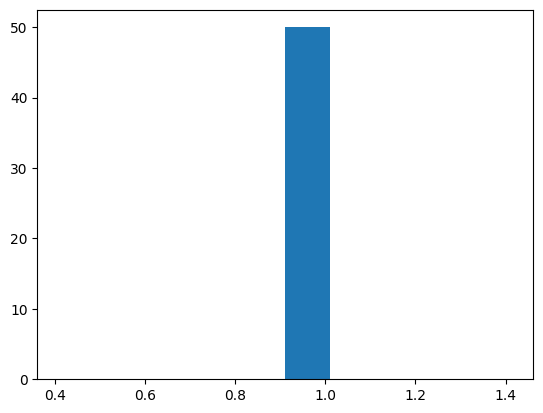

In [36]:
plt.hist(accuracy_score)
plt.show()

In [37]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
confusion_matrix

array([[32042,   404],
       [ 2785,   769]])

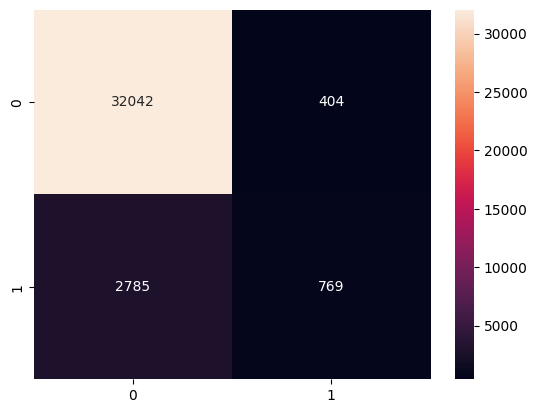

Confusion Matrix:
[[32042   404]
 [ 2785   769]]


In [38]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()
print("Confusion Matrix:")
print(confusion_matrix)

In [39]:
classification_report = metrics.classification_report(y_test, y_predict)
print(classification_report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     32446
           1       0.66      0.22      0.33      3554

    accuracy                           0.91     36000
   macro avg       0.79      0.60      0.64     36000
weighted avg       0.89      0.91      0.89     36000



In [40]:
equalize_transaction_train = predictors.copy()
equalize_transaction_train.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,2.5791,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,8.5524,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,1.2145,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,6.8202,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,10.1102,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


## Data Visualization


20. Compare the results of your cross-validation with the whole training data and the reduced 50/50 training data

1. Present the confusion matrix and the results of your Classification Report (sklearn.metrics.classification_report)




## Communicate the Results

22. Communicate the results of your analysis.



## Submit Final Project

23. Upload your finished Jupyter notebook to your Project 1 student folder.
